# Circles

In [ ]:
from sklearn.datasets import make_circles

n_samples = 1000
X, y = make_circles(n_samples, noise=0.03)

In [ ]:
import pandas as pd

circles = pd.DataFrame({"X0":X[:, 0], "X1": X[:, 1], "label": y})

In [ ]:
circles

,X0,X1,label
0,0.500738,0.847728,0
1,-0.618690,-0.820076,0
2,-0.801391,0.185799,1
3,0.697291,-0.385442,1
4,-0.696993,0.455050,1
...,...,...,...
995,-0.784432,-0.660525,0
996,0.263741,-0.730790,1
997,-0.717803,-0.664499,0
998,-0.150688,0.759285,1


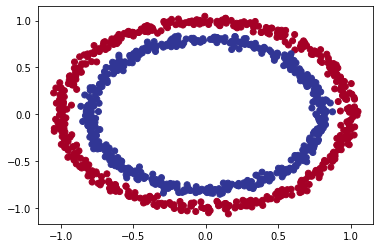

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)

In [ ]:
X.shape, y.shape

((1000, 2), (1000,))

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
# build a model
import tensorflow as tf

model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid"),
])

# activation="sigmoid" for binary classification
# activation="softmax" for multiclass classification

model.compile(loss=tf.keras.losses.BinaryCrossentropy(), optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), metrics=["accuracy"])

history = model.fit(X_train, y_train, epochs=50, verbose=0)


Text(0.5, 1.0, 'Model loss curves')

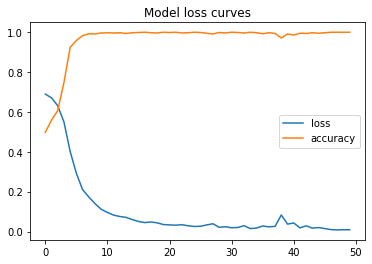

In [ ]:
# plt.plot(history.history['accuracy'])
# plt.plot(history.history['loss'])

pd.DataFrame(history.history).plot()
plt.title("Model loss curves")

In [ ]:
model.evaluate(X_test, y_test)

7/7 [==============================] - 0s 4ms/step - loss: 0.0125 - accuracy: 1.0000


[0.012503154575824738, 1.0]

In [ ]:
import numpy as np

def plt_decision_boundary(model, X, y):
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
  x_in = np.c_[xx.ravel(), yy.ravel()]
  y_pred = model.predict(x_in)

  if len(y_pred[0]) > 1:
    print("doing multiclass classification")
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classification")
    y_pred = np.round(y_pred).reshape(xx.shape)
  
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=5, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

313/313 [==============================] - 1s 3ms/step
doing binary classification


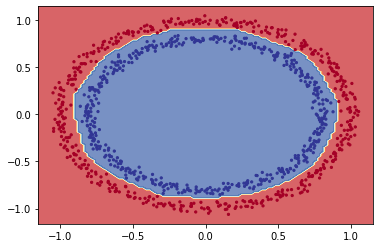

In [ ]:
plt_decision_boundary(model, X, y)

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               300       
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 1,321
Trainable params: 1,321
Non-trainable params: 0
_________________________________________________________________


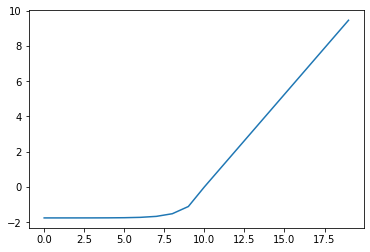

In [ ]:
import matplotlib.pyplot as plt
A = tf.cast(tf.range(-10, 10), tf.float32)
plt.plot(tf.keras.activations.selu(A))

In [ ]:
def compare_classification_sets(model, X_train, y_train, X_test, y_test):
  plt.figure(figsize=(12, 6))
  plt.subplot(1, 2, 1)
  plt.title("Train")
  plt_decision_boundary(model, X_train, y_train)
  plt.subplot(1, 2, 2)
  plt.title("Test")
  plt_decision_boundary(model, X_test, y_test)
  plt.show()

313/313 [==============================] - 0s 1ms/step
doing binary classification
313/313 [==============================] - 0s 1ms/step
doing binary classification


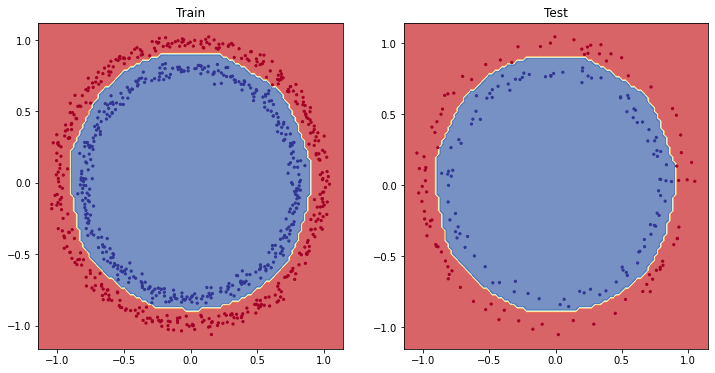

In [ ]:
compare_classification_sets(model, X_train, y_train, X_test, y_test)

In [ ]:
# build a model
import tensorflow as tf

model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid"),
])


model.compile(loss=tf.keras.losses.BinaryCrossentropy(), optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), metrics=["accuracy"])

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10 ** (epoch / 20))

history = model.fit(X_train, y_train, epochs=100, callbacks=[lr_scheduler])

Epoch 1/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7098 - accuracy: 0.4863 - lr: 1.0000e-04
Epoch 2/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7073 - accuracy: 0.4900 - lr: 1.1220e-04
Epoch 3/100
25/25 [==============================] - 0s 3ms/step - loss: 0.7047 - accuracy: 0.4837 - lr: 1.2589e-04
Epoch 4/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7019 - accuracy: 0.4762 - lr: 1.4125e-04
Epoch 5/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6996 - accuracy: 0.4888 - lr: 1.5849e-04
Epoch 6/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6974 - accuracy: 0.4825 - lr: 1.7783e-04
Epoch 7/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6956 - accuracy: 0.4712 - lr: 1.9953e-04
Epoch 8/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6939 - accuracy: 0.4575 - lr: 2.2387e-04
Epoch 9/100
25/25 [==============================] - 0s 2ms/step - loss:

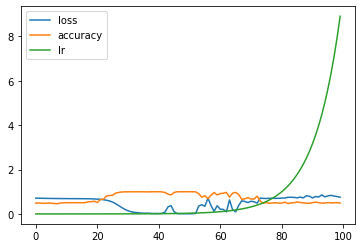

In [ ]:
pd.DataFrame(history.history).plot()

313/313 [==============================] - 0s 1ms/step
doing binary classification
313/313 [==============================] - 0s 1ms/step
doing binary classification


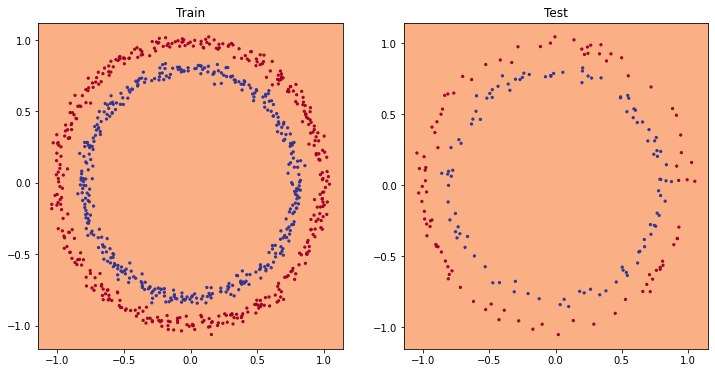

In [ ]:
compare_classification_sets(model, X_train, y_train, X_test, y_test)

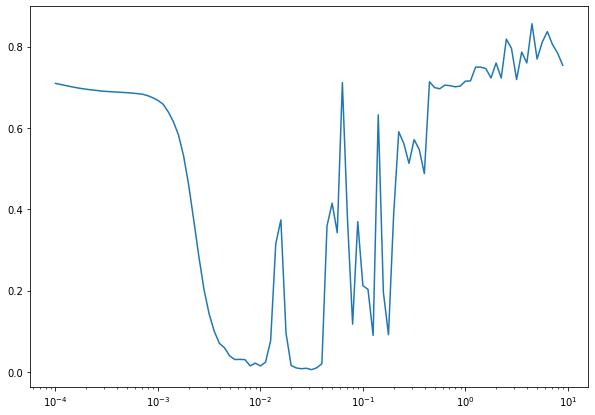

In [ ]:
lrs = 1e-4 * (10 ** (tf.range(100) / 20))
plt.figure(figsize=(10, 7))
plt.semilogx(lrs, history.history["loss"])

In [ ]:
import tensorflow as tf

model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid"),
])


model.compile(loss=tf.keras.losses.BinaryCrossentropy(), optimizer=tf.keras.optimizers.Adam(learning_rate=0.008), metrics=["accuracy"])

# lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10 ** (epoch / 20))

history = model.fit(X_train, y_train, epochs=100)

Epoch 1/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6939 - accuracy: 0.4888
Epoch 2/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6817 - accuracy: 0.5725
Epoch 3/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6625 - accuracy: 0.5738
Epoch 4/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6182 - accuracy: 0.7025
Epoch 5/100
25/25 [==============================] - 0s 2ms/step - loss: 0.5424 - accuracy: 0.7850
Epoch 6/100
25/25 [==============================] - 0s 2ms/step - loss: 0.4262 - accuracy: 0.8825
Epoch 7/100
25/25 [==============================] - 0s 2ms/step - loss: 0.3367 - accuracy: 0.9400
Epoch 8/100
25/25 [==============================] - 0s 2ms/step - loss: 0.2459 - accuracy: 0.9800
Epoch 9/100
25/25 [==============================] - 0s 2ms/step - loss: 0.1965 - accuracy: 0.9925
Epoch 10/100
25/25 [==============================] - 0s 2ms/step - loss: 0.1642 - accuracy: 0.9950
Epoch 11/

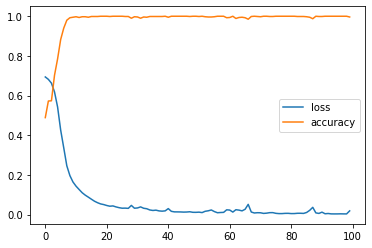

In [ ]:
pd.DataFrame(history.history).plot()

313/313 [==============================] - 0s 1ms/step
doing binary classification
313/313 [==============================] - 0s 1ms/step
doing binary classification


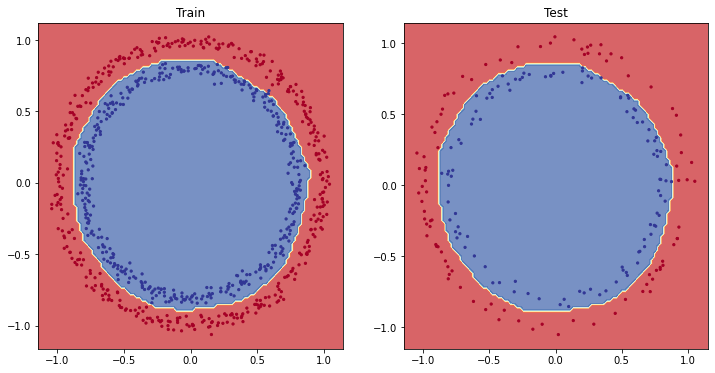

In [ ]:
compare_classification_sets(model, X_train, y_train, X_test, y_test)

In [ ]:
model.evaluate(X_test, y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.0111 - accuracy: 1.0000


[0.011119373142719269, 1.0]

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.0111 - accuracy: 1.0000


In [ ]:
loss, accuracy

(0.011119373142719269, 1.0)

7/7 [==============================] - 0s 2ms/step


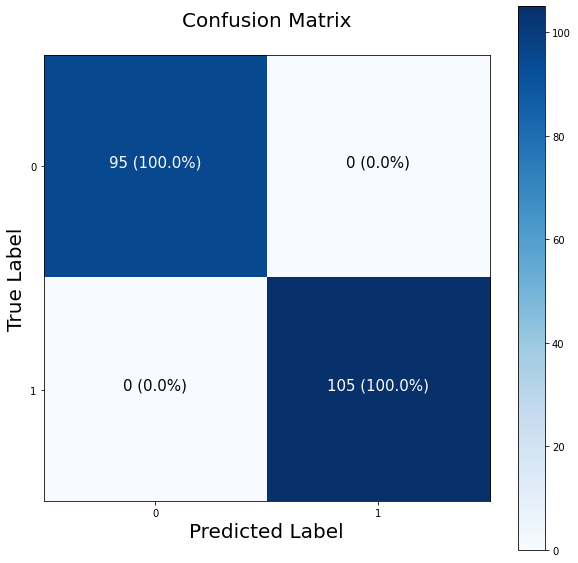

In [ ]:
# confusion matrix
from sklearn.metrics import confusion_matrix
import itertools


def plot_confussion_matrix(model, X_test):
  y_preds = model.predict(X_test)
  cm = confusion_matrix(y_test, tf.round(y_preds))
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]
  n_classes = cm.shape[0]
  labels = np.arange(n_classes)
  fig, ax = plt.subplots(figsize=(10, 10))
  cax = ax.matshow(cm, cmap=plt.cm.Blues)
  fig.colorbar(cax)
  ax.set(
      title="Confusion Matrix",
      xlabel="Predicted Label",
      ylabel="True Label",
      xticks=np.arange(n_classes),
      yticks=np.arange(n_classes),
      xticklabels=labels,
      yticklabels=labels
  )

  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom();

  ax.xaxis.label.set_size(20)
  ax.yaxis.label.set_size(20)
  ax.title.set_size(20)

  threshold = (cm.max() + cm.min()) / 2.;

  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j] * 100:.1f}%)", color="white" if cm[i, j] > threshold else "black", size=15, horizontalalignment="center")


plot_confussion_matrix(model, X_test)

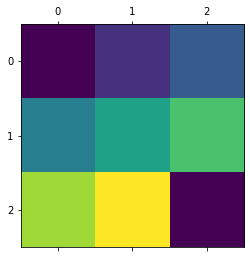

In [ ]:
plt.matshow([
    [1, 2, 3],
    [4, 5, 6],
    [7, 8, 1]
])

# Clothes

In [ ]:
# Different items of clothing
# https://matplotlib.org/stable/tutorials/colors/colormaps.html
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


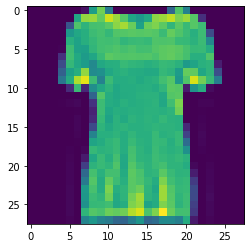

In [ ]:
# plt.matshow(X_train[0], cmap=plt.cm.Blues)
# print(y_train[:10])
plt.imshow(X_train[10])

In [ ]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

len(class_names)

10

Text(0.5, 1.0, 'Trouser')

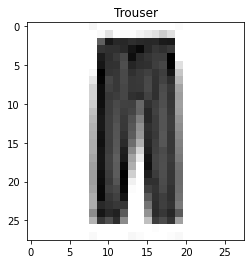

In [ ]:
idx = 21
plt.imshow(X_train[idx], cmap=plt.cm.binary)
plt.title(class_names[y_train[idx]])

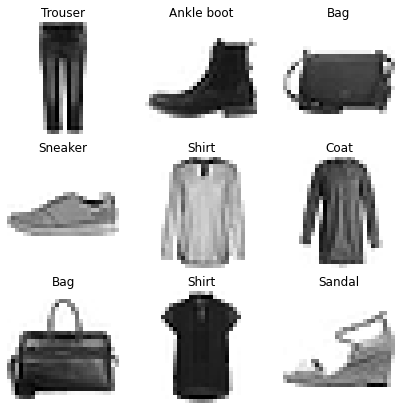

In [ ]:
import random
plt.figure(figsize=(7, 7))
for i in range(9):
  ax = plt.subplot(3, 3, i + 1)
  rand_index = random.choice(range(len(X_train)))
  plt.imshow(X_train[rand_index], cmap=plt.cm.binary)
  plt.title(class_names[y_train[rand_index]])
  plt.axis(False)

In [ ]:
tf.one_hot(y_train[:10], depth=10), y_train[:10]

(<tf.Tensor: shape=(10, 10), dtype=float32, numpy=
 array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]], dtype=float32)>,
 array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8))

In [ ]:
model = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(100, activation="relu"),
  tf.keras.layers.Dense(50, activation="relu"), 
  tf.keras.layers.Dense(10, activation=tf.keras.activations.softmax), 
])

X_train_norm = X_train / X_train.max()
X_test_norm = X_test / X_test.max()

model.compile(loss=tf.keras.losses.CategoricalCrossentropy(), optimizer=tf.keras.optimizers.Adam(), metrics=["accuracy"])

# tf.keras.losses.CategoricalCrossentropy() when one-hot encoded
# tf.keras.losses.SparseCategoricalCrossentropy() when not one-hot encoded

non_norm_history = model.fit(X_train, tf.one_hot(y_train, depth=10), epochs=10, validation_data=(X_test, tf.one_hot(y_test, depth=10))) 

Epoch 1/10
1875/1875 [==============================] - 5s 3ms/step - loss: 2.0537 - accuracy: 0.7486 - val_loss: 0.7699 - val_accuracy: 0.7621
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5821 - accuracy: 0.8077 - val_loss: 0.5340 - val_accuracy: 0.8196
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5193 - accuracy: 0.8219 - val_loss: 0.4998 - val_accuracy: 0.8274
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4900 - accuracy: 0.8286 - val_loss: 0.4712 - val_accuracy: 0.8365
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4455 - accuracy: 0.8406 - val_loss: 0.4570 - val_accuracy: 0.8411
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4331 - accuracy: 0.8450 - val_loss: 0.4725 - val_accuracy: 0.8309
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4094 - accuracy: 0.8543 - val_loss: 0.4753 - val_accuracy:

In [ ]:
model = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(100, activation="relu"),
  tf.keras.layers.Dense(50, activation="relu"), 
  tf.keras.layers.Dense(10, activation=tf.keras.activations.softmax), 
])

X_train_norm = X_train / X_train.max()
X_test_norm = X_test / X_test.max()

model.compile(loss=tf.keras.losses.CategoricalCrossentropy(), optimizer=tf.keras.optimizers.Adam(), metrics=["accuracy"])

# tf.keras.losses.CategoricalCrossentropy() when one-hot encoded
# tf.keras.losses.SparseCategoricalCrossentropy() when not one-hot encoded

norm_history = model.fit(X_train_norm, tf.one_hot(y_train, depth=10), epochs=10, validation_data=(X_test_norm, tf.one_hot(y_test, depth=10))) 

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5092 - accuracy: 0.8178 - val_loss: 0.4316 - val_accuracy: 0.8427
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3775 - accuracy: 0.8626 - val_loss: 0.3940 - val_accuracy: 0.8571
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3404 - accuracy: 0.8749 - val_loss: 0.3807 - val_accuracy: 0.8644
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3187 - accuracy: 0.8819 - val_loss: 0.3777 - val_accuracy: 0.8666
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3010 - accuracy: 0.8878 - val_loss: 0.3497 - val_accuracy: 0.8749
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2840 - accuracy: 0.8937 - val_loss: 0.3510 - val_accuracy: 0.8758
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2741 - accuracy: 0.8971 - val_loss: 0.3485 - val_accuracy:

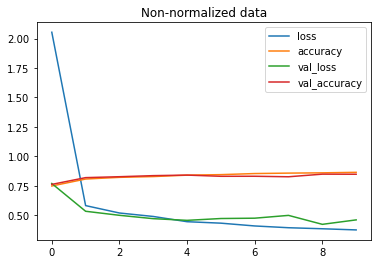

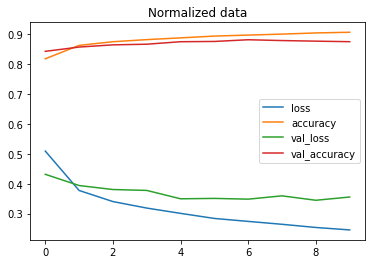

In [ ]:
import pandas as pd
pd.DataFrame(non_norm_history.history).plot(title="Non-normalized data")
pd.DataFrame(norm_history.history).plot(title="Normalized data")

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax"),
])

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))

model.compile(loss=tf.keras.losses.CategoricalCrossentropy(), optimizer=tf.keras.optimizers.Adam(), metrics=["accuracy"])

norm_history = model.fit(
    X_train_norm,
    tf.one_hot(y_train, depth=10),
    epochs=40,
    validation_data=(X_test_norm, tf.one_hot(y_test, depth=10)),
    callbacks=[lr_scheduler]
) 

Epoch 1/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5059 - accuracy: 0.8194 - val_loss: 0.4362 - val_accuracy: 0.8460 - lr: 0.0010
Epoch 2/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3793 - accuracy: 0.8622 - val_loss: 0.3809 - val_accuracy: 0.8657 - lr: 0.0011
Epoch 3/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3473 - accuracy: 0.8738 - val_loss: 0.3697 - val_accuracy: 0.8649 - lr: 0.0013
Epoch 4/40
1153/1875 [=================>............] - ETA: 2s - loss: 0.3262 - accuracy: 0.8799

KeyboardInterrupt: ignored

ValueError: ignored

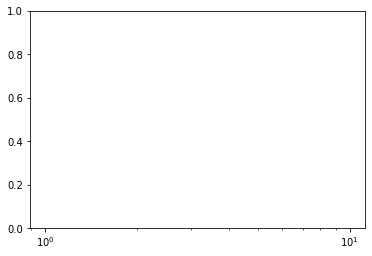

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

lrs = 1e-3 * (10**(tf.range(40) / 20))
plt.semilogx(lrs, norm_history.history["loss"])
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Find Learning Rate")

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax"),
])

# lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))

model.compile(loss=tf.keras.losses.CategoricalCrossentropy(), optimizer=tf.keras.optimizers.Adam(), metrics=["accuracy"])

norm_history = model.fit(
    X_train_norm,
    tf.one_hot(y_train, depth=10),
    epochs=40,
    validation_data=(X_test_norm, tf.one_hot(y_test, depth=10)),
    # callbacks=[lr_scheduler]
) 

Epoch 1/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5096 - accuracy: 0.8200 - val_loss: 0.4116 - val_accuracy: 0.8514
Epoch 2/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3754 - accuracy: 0.8633 - val_loss: 0.3783 - val_accuracy: 0.8645
Epoch 3/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3386 - accuracy: 0.8751 - val_loss: 0.3721 - val_accuracy: 0.8611
Epoch 4/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3149 - accuracy: 0.8844 - val_loss: 0.3615 - val_accuracy: 0.8677
Epoch 5/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2984 - accuracy: 0.8898 - val_loss: 0.3613 - val_accuracy: 0.8717
Epoch 6/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2828 - accuracy: 0.8951 - val_loss: 0.3613 - val_accuracy: 0.8681
Epoch 7/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2708 - accuracy: 0.8981 - val_loss: 0.3594 - val_accuracy:

In [21]:
# confusion matrix
from sklearn.metrics import confusion_matrix
import itertools
import numpy as np

def plot_confussion_matrix(y_true, y_pred, figsize, classes=None):
  cm = confusion_matrix(y_true, tf.round(y_pred))
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]
  n_classes = cm.shape[0]
  fig, ax = plt.subplots(figsize=figsize)
  cax = ax.matshow(cm, cmap=plt.cm.Blues)
  fig.colorbar(cax)
  labels = None

  print(np.arange(n_classes))

  if classes:
    labels = classes
  else:
    labels = np.arange(n_classes)

  ax.set(
      title="Confusion Matrix",
      xlabel="Predicted Label",
      ylabel="True Label",
      xticks=np.arange(n_classes),
      yticks=np.arange(n_classes),
      xticklabels=labels,
      yticklabels=labels
  )

  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom();

  ax.xaxis.label.set_size(20)
  ax.yaxis.label.set_size(20)
  ax.title.set_size(20)

  threshold = (cm.max() + cm.min()) / 2.;

  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j] * 100:.1f}%)", color="white" if cm[i, j] > threshold else "black", size=15, horizontalalignment="center")


In [ ]:
y_probs = model.predict(X_test_norm)

313/313 [==============================] - 0s 1ms/step


Coat


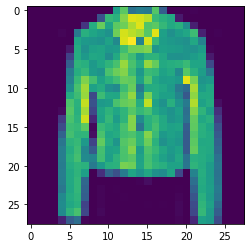

In [ ]:
idx = 10
print(class_names[tf.argmax(y_probs[idx])])
plt.imshow(X_test[idx])

In [ ]:
from sklearn.metrics import confusion_matrix
y_preds = y_probs.argmax(axis=1)
confusion_matrix(y_test, y_preds)

array([[789,   3,   9,  35,   5,   0, 151,   0,   8,   0],
       [  1, 983,   4,   8,   2,   0,   2,   0,   0,   0],
       [ 19,   4, 761,   9, 113,   0,  92,   0,   2,   0],
       [ 14,  14,  15, 906,  24,   1,  22,   0,   4,   0],
       [  0,   3,  74,  31, 836,   0,  56,   0,   0,   0],
       [  0,   0,   0,   1,   0, 946,   0,  23,   1,  29],
       [ 88,   3,  62,  33,  70,   0, 729,   0,  15,   0],
       [  0,   0,   0,   0,   0,   7,   0, 961,   0,  32],
       [  2,   2,   3,   6,   3,   1,   4,   5, 973,   1],
       [  0,   0,   0,   1,   0,   5,   1,  28,   0, 965]])

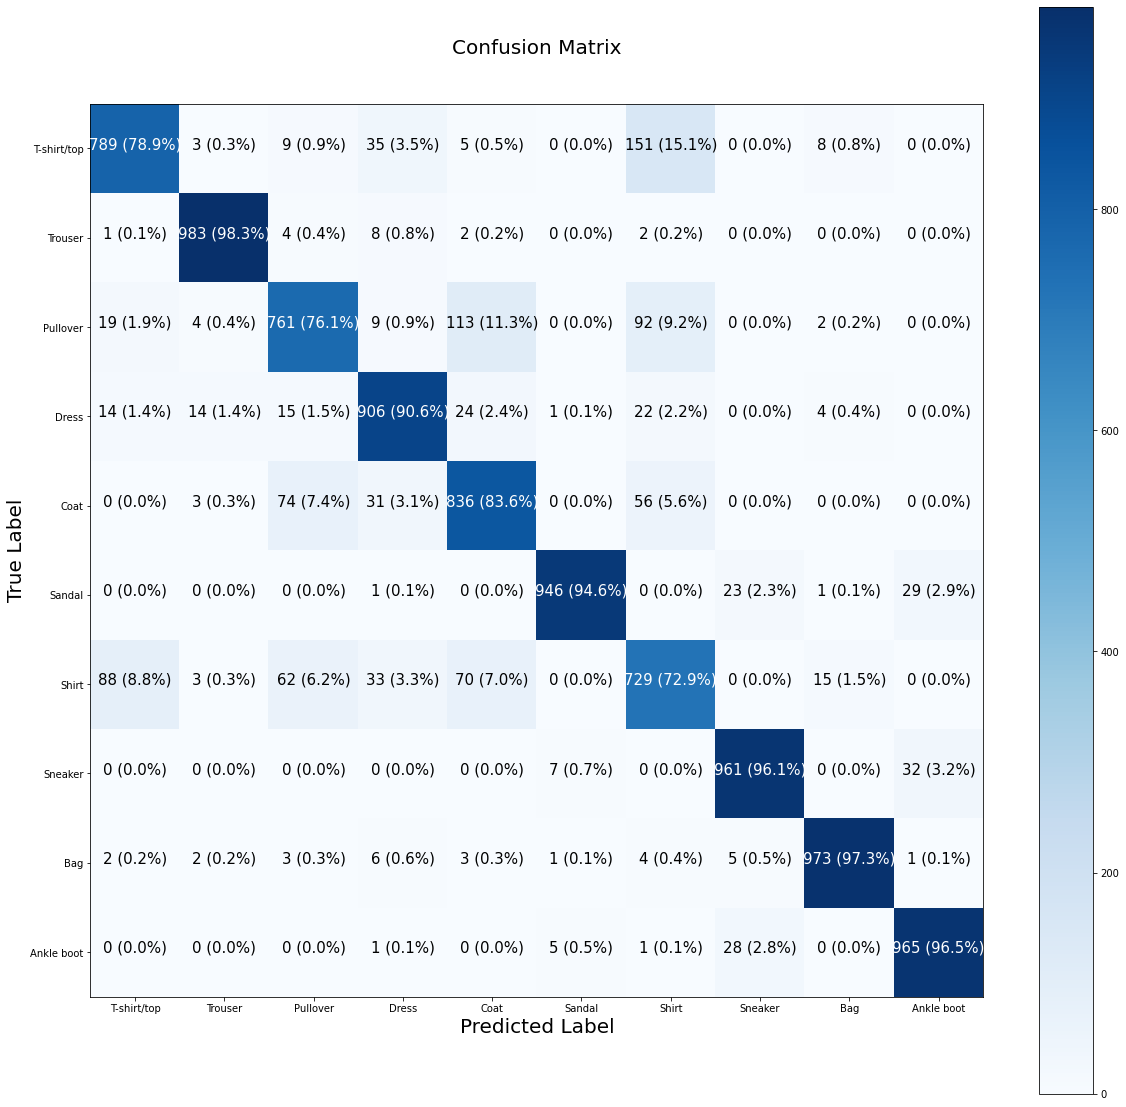

In [ ]:
plot_confussion_matrix(y_test, y_preds, figsize=(20, 20), classes=class_names)

In [17]:
import random

def plot_random_image(model, images, y_true, classes):
  i = random.randint(0, len(images))

  target_image = images[i]
  pred_probs = model.predict(target_image.reshape(1, 28, 28))
  pred_class = classes[pred_probs.argmax()]
  true_class = classes[y_true[i]]
  print(true_class)

  plt.imshow(target_image, cmap=plt.cm.Blues)

  if pred_class == true_class:
    color = "green"
  else:
    color = "red"

  plt.xlabel(f"Pred: {pred_class} {100*tf.reduce_max(pred_probs):2.0f}% (True: {true_class})", color=color)

In [ ]:
plot_random_image(model, X_test_norm, y_test, class_names)

In [ ]:
weights, biases = model.layers[3].get_weights()

weights.shape, biases.shape

((50, 10), (10,))

In [ ]:
model.save('clothes.h5')

# Numbers

In [8]:
import tensorflow as tf

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [9]:
x_train_norm = x_train / x_train.max()
x_test_norm = x_test / x_test.max()

In [10]:
y_train_encoded = tf.one_hot(y_train, depth=10)
y_test_encoded = tf.one_hot(y_test, depth=10)

In [11]:
y_train_encoded[10:20], y_train[10:20]

(<tf.Tensor: shape=(10, 10), dtype=float32, numpy=
 array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)>,
 array([3, 5, 3, 6, 1, 7, 2, 8, 6, 9], dtype=uint8))

In [12]:
x_train_norm

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

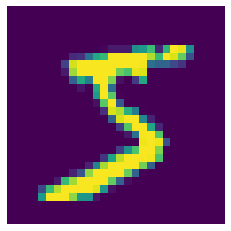

In [13]:
import matplotlib.pyplot as plt

plt.axis(False)
plt.imshow(x_train_norm[0])

In [14]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(70, activation="relu"),
    tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.Dense(30, activation="relu"),
    tf.keras.layers.Dense(20, activation="relu"),
    tf.keras.layers.Dense(11, activation="relu"),
    tf.keras.layers.Dense(10, activation=tf.keras.activations.softmax),
])

model.compile(loss=tf.keras.losses.CategoricalCrossentropy(), optimizer=tf.keras.optimizers.Adam(), metrics=["accuracy"])

numbers_history = model.fit(
    x_train_norm,
    y_train_encoded,
    epochs=20,
    validation_data=(x_test_norm, y_test_encoded),
)


Epoch 1/20
1875/1875 [==============================] - 9s 3ms/step - loss: 0.3662 - accuracy: 0.8926 - val_loss: 0.1534 - val_accuracy: 0.9566
Epoch 2/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1370 - accuracy: 0.9602 - val_loss: 0.1189 - val_accuracy: 0.9643
Epoch 3/20
1875/1875 [==============================] - 7s 3ms/step - loss: 0.0945 - accuracy: 0.9718 - val_loss: 0.1128 - val_accuracy: 0.9690
Epoch 4/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0779 - accuracy: 0.9774 - val_loss: 0.1065 - val_accuracy: 0.9699
Epoch 5/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0608 - accuracy: 0.9815 - val_loss: 0.0998 - val_accuracy: 0.9714
Epoch 6/20
1875/1875 [==============================] - 7s 3ms/step - loss: 0.0509 - accuracy: 0.9846 - val_loss: 0.0848 - val_accuracy: 0.9770
Epoch 7/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0472 - accuracy: 0.9856 - val_loss: 0.0988 - val_accuracy:

In [15]:
model.evaluate(x_test_norm, y_test_encoded)

y_probs = model.predict(x_test_norm)
y_preds = y_probs.argmax(axis=1)

313/313 [==============================] - 1s 2ms/step


1/1 [==============================] - 0s 66ms/step
tf.Tensor(9, shape=(), dtype=int32)


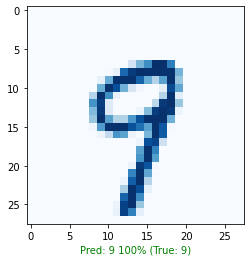

In [18]:
plot_random_image(model=model, images=x_test, y_true=y_test, classes=tf.range(10))

[0 1 2 3 4 5 6 7 8 9]


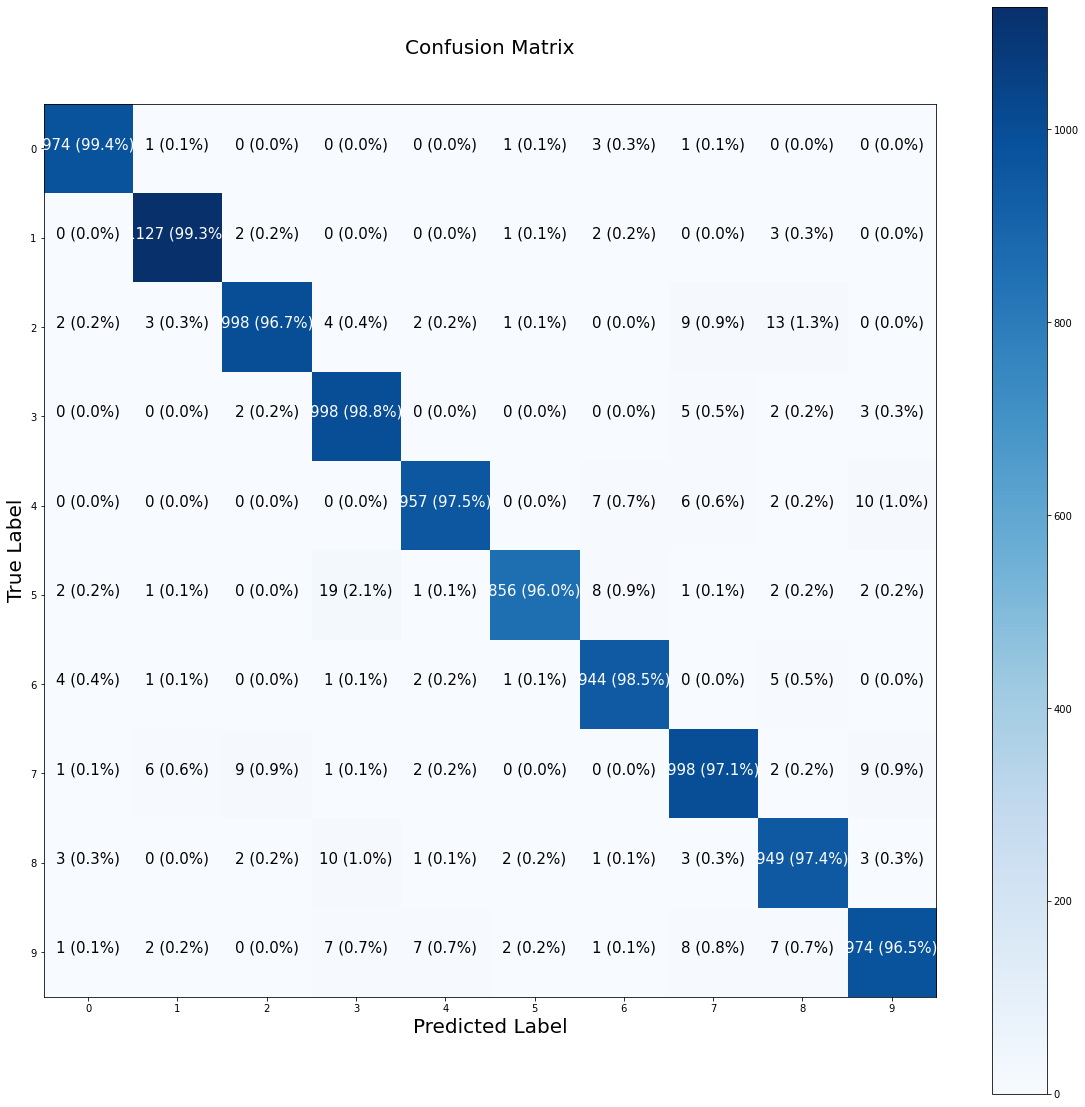

In [22]:
plot_confussion_matrix(y_test, y_preds, figsize=(20, 20), classes=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [23]:
model.save('number_model.h5')

In [26]:
import os
print(os.getcwd())

/content
